In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))

In [4]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [5]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [6]:
print(kn.predict([[25, 150]]))

[0.]


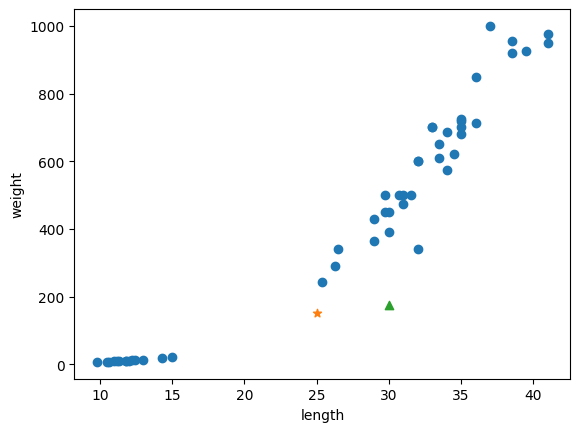

In [31]:
import matplotlib.pyplot as plt

plt.scatter(fish_data[:,0], fish_data[:,1])

plt.xlabel('length')
plt.ylabel('weight')

plt.scatter(25, 150, marker='*')
plt.scatter(30, 176, marker='^')

plt.show()

In [9]:
distances, indexes = kn.kneighbors([[25, 150]])

In [10]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
        138.32150953]])

In [11]:
indexes

array([[ 0, 48, 47, 45, 46]])

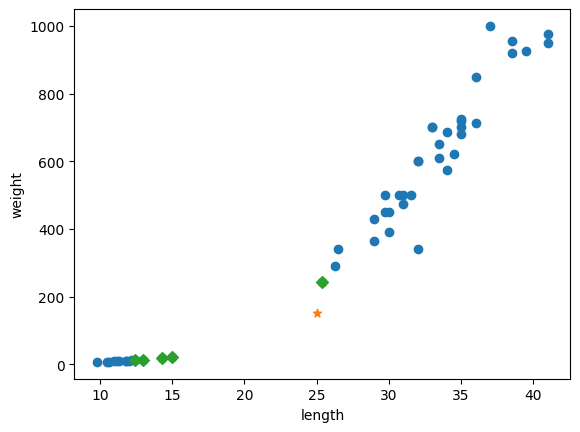

In [13]:
plt.scatter(fish_data[:,0], fish_data[:,1])
plt.xlabel('length')
plt.ylabel('weight')

plt.scatter(25, 150, marker='*')
plt.scatter(fish_data[indexes,0], fish_data[indexes,1], marker='D')

plt.show()

In [16]:
print(fish_target[indexes])

[[1. 0. 0. 0. 0.]]


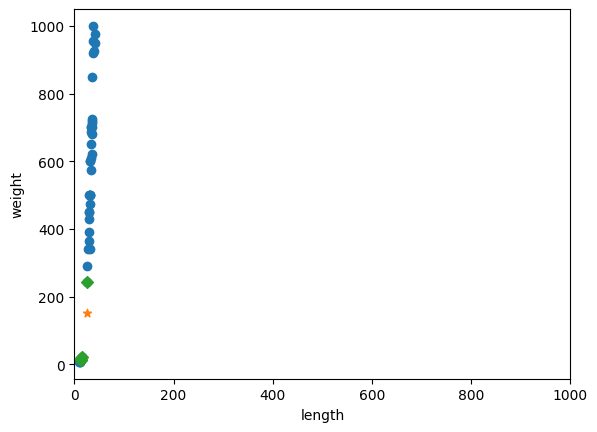

In [17]:
plt.scatter(fish_data[:,0], fish_data[:,1])
plt.xlabel('length')
plt.ylabel('weight')

plt.scatter(25, 150, marker='*')
plt.scatter(fish_data[indexes,0], fish_data[indexes,1], marker='D')

plt.xlim((0, 1000))

plt.show()

In [19]:
mean = np.mean(fish_data, axis=0)
std = np.std(fish_data, axis=0)

print(mean, std)

[ 27.05510204 444.5       ] [ 10.13774642 324.77757224]


In [20]:
train_scaled = (fish_data - mean) / std

In [21]:
train_scaled

array([[-0.16326134, -0.62350364],
       [-0.07448421, -0.47571019],
       [-0.05475596, -0.32175867],
       [ 0.19184717, -0.25094097],
       [ 0.19184717, -0.04464594],
       [ 0.26089605,  0.01693467],
       [ 0.26089605,  0.17088618],
       [ 0.29048842, -0.16780715],
       [ 0.29048842,  0.01693467],
       [ 0.3595373 ,  0.17088618],
       [ 0.38912967,  0.09391043],
       [ 0.38912967,  0.17088618],
       [ 0.4384503 ,  0.17088618],
       [ 0.48777093, -0.32175867],
       [ 0.48777093,  0.47878922],
       [ 0.48777093,  0.47878922],
       [ 0.58641218,  0.78669225],
       [ 0.58641218,  0.78669225],
       [ 0.6357328 ,  0.50957952],
       [ 0.6357328 ,  0.63274074],
       [ 0.68505343,  0.40181346],
       [ 0.68505343,  0.7405068 ],
       [ 0.73437406,  0.54036983],
       [ 0.78369468,  0.72511165],
       [ 0.78369468,  0.78669225],
       [ 0.78369468,  0.86366801],
       [ 0.78369468,  0.84827286],
       [ 0.88233593,  0.82979868],
       [ 0.88233593,

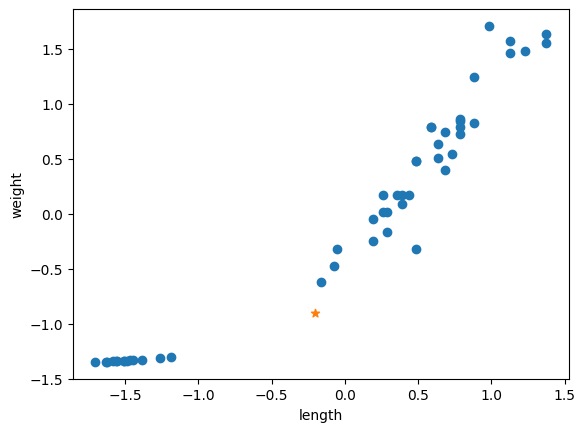

In [22]:
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
kn.fit(train_scaled, fish_target)

KNeighborsClassifier()

In [24]:
distances, indexes = kn.kneighbors([new])

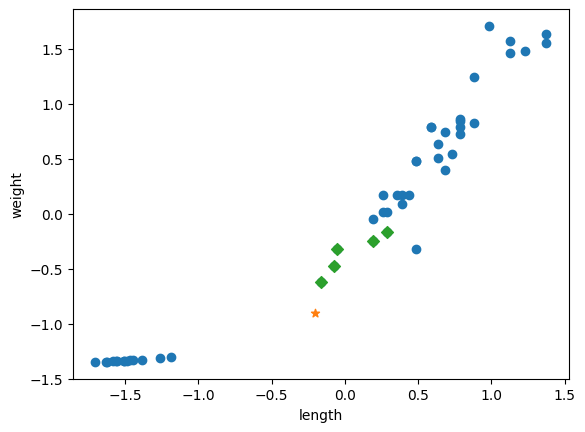

In [25]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])

plt.xlabel('length')
plt.ylabel('weight')

plt.scatter(new[0], new[1], marker='*')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')

plt.show()

In [28]:
kn = KNeighborsClassifier(n_neighbors=45)
kn.fit(train_scaled, fish_target)

KNeighborsClassifier(n_neighbors=45)

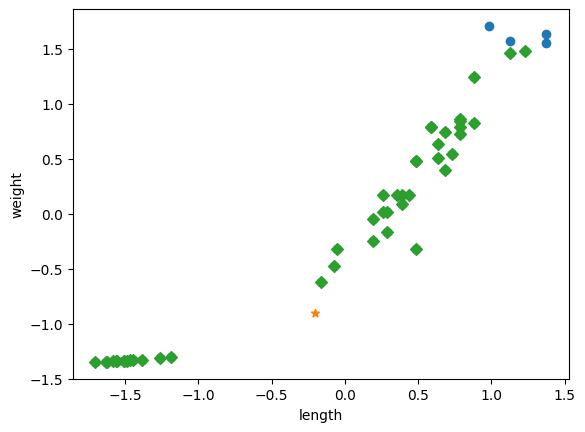

In [29]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])

plt.xlabel('length')
plt.ylabel('weight')

plt.scatter(new[0], new[1], marker='*')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')

plt.show()